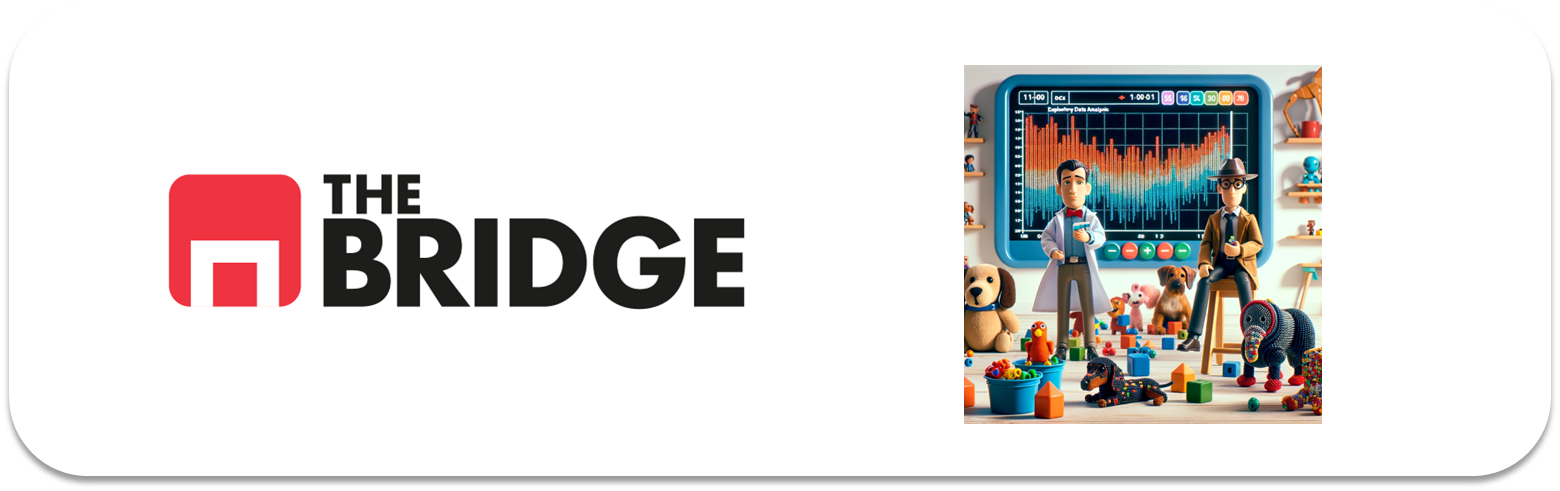

## Análisis de Datos (Bivariante): Combinada categórica-numérica

Vamos al grano y analicemos como ejemplos algunos pares combinados o mixtos de variables categóricas y numéricas para nuestros casos de uso.

Y, ¿cómo no?, preparemos lo que necesitamos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene

df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Caso 1. Seguros: Bivariante response-CLV

Pues no nos queda otra que analizar la relación de las variables target o directoras entre sí. Como antes, primero veamos sus valores por separado:

**#1**  Tener la referencia de la **distribución de valores por separado de cada variable**

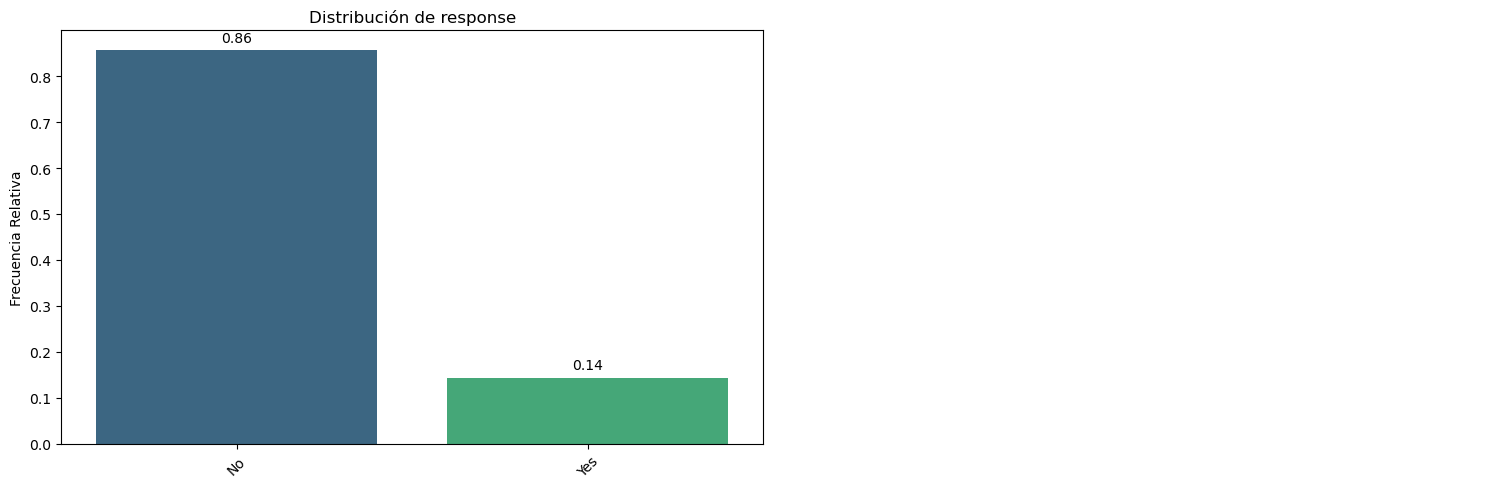

In [2]:
pinta_distribucion_categoricas(df_seguros,["response"], relativa= True, mostrar_valores= True)

(2,)


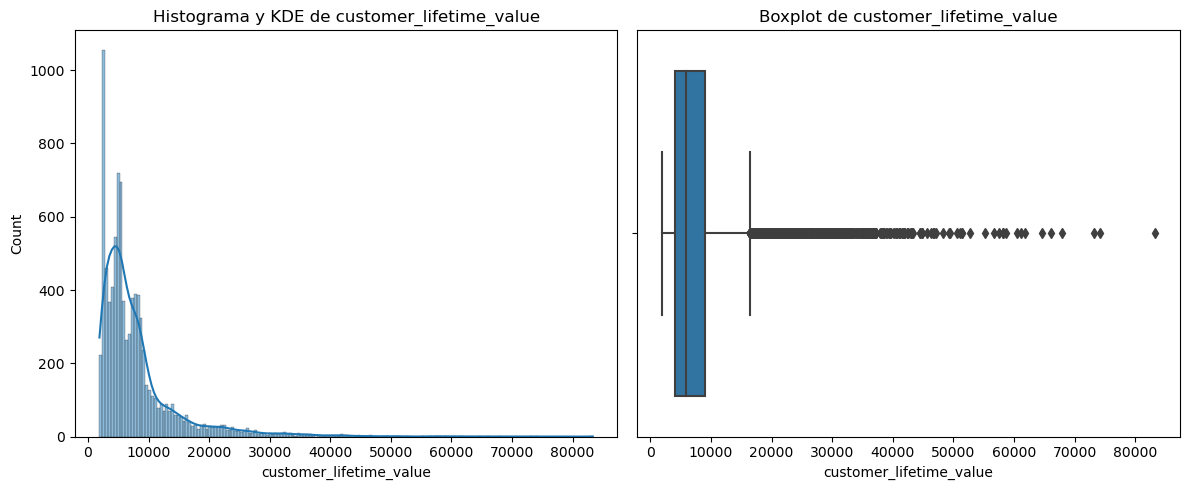

In [3]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

**#2** Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. **Empezamos con la mediana:**

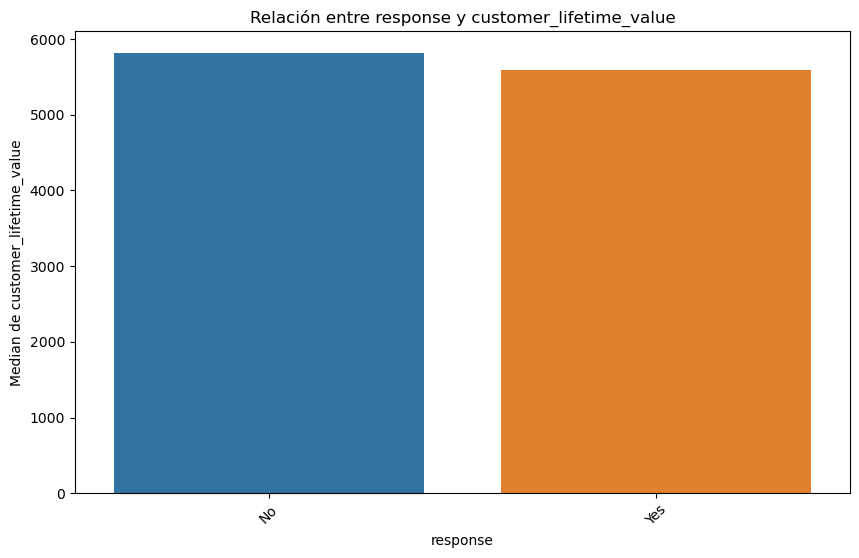

In [4]:
plot_categorical_numerical_relationship(df_seguros,"response","customer_lifetime_value", measure = "median")

Aquí hay una ligera diferencia, pero con ver la gráfica de histograma-densidad o el boxplot de CLV ya sabemos que la tendencia central no es la mejor reperesentación.



**#3** Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. **Comparemos los diagramas de caja:**

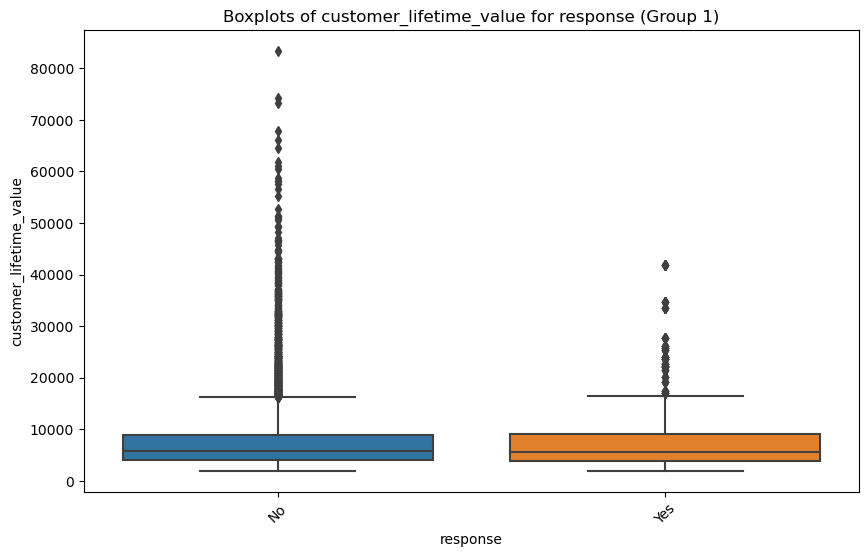

In [5]:
plot_grouped_boxplots(df_seguros,"response","customer_lifetime_value")

Este diagrama ya lo vimos, ¿recuerdas? En cualquier caso ya nos va predisponiendo, ¿verdad? a pensar que... Bueno seamos más puntillosos veamos los histogramas

**#4** Mostramos diferentes medidas de la variable numérica en función de los valores de la categórica. **Comparemos los histogramas:**

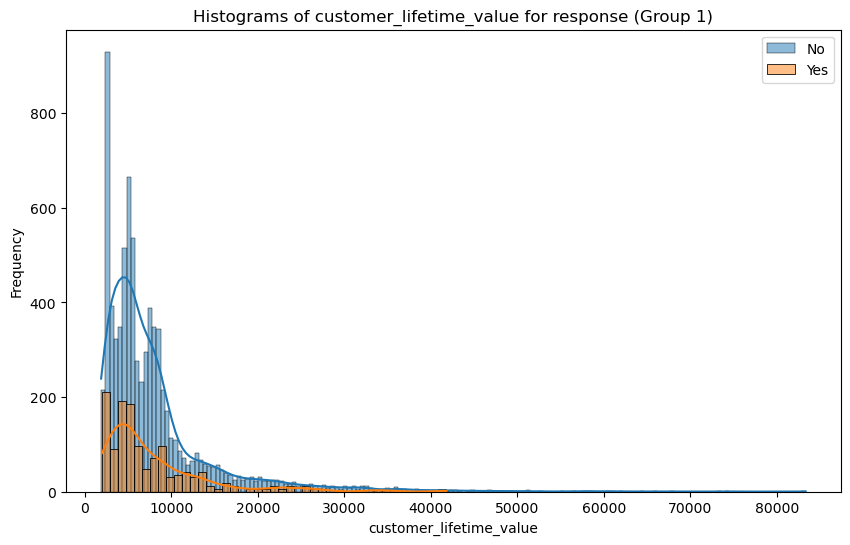

In [8]:
plot_grouped_histograms(df_seguros,"response", "customer_lifetime_value", 2)

Tiene pinta de que salvo por el hecho de que los rangos no coinciden, no hay dependencia entre ambas. Es decir que la respuesta comercial es independiente del CLV. Este resultado me invita a:
* Hacer uso de los test estadísticos para comprobar la independencia de las dos variables [Eso del test lo veremos con cariño en la parte de estadística inferencial, pero veremos como usarlo en un par de píldoras]
* Hacer el análisis descartando outliers, o mejor, hacer un análisis sin outliers y otro para outliers. [Te lo dejo como ejercicio práctico]

En principio me quedo con la intuición/hipótesis de que el CLV y responder a las ofertas de marketing es aparentemente independiente.

Y así seguiría con el resto de variables numéricas y response, por ejemplo. Pero también tendría que hacerlo con las otras categóricas y CLV, porque de hecho es lo que nos han pedido. Por eso te dejo aquí el análisis con `education`, para que lo revises tranquilamente, aunque el vídeo salta a hacer un análisis bivariante visual combinado para el caso 2.

#### Ejemplo extra: CLV-Education

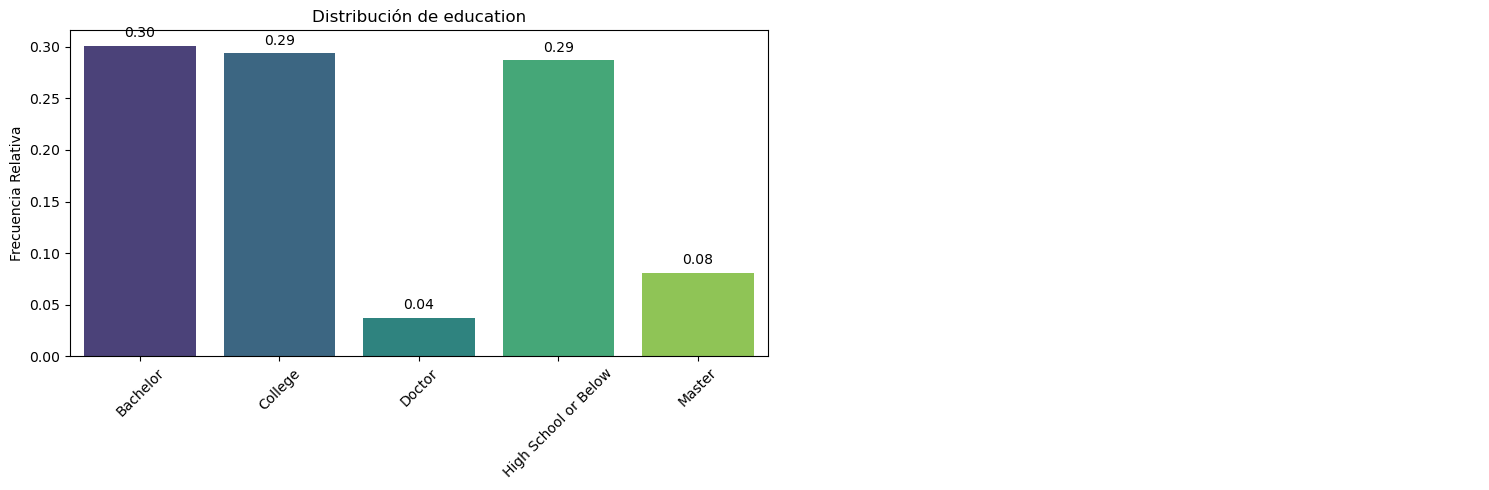

In [9]:
pinta_distribucion_categoricas(df_seguros,["education"], relativa= True, mostrar_valores= True)

(2,)


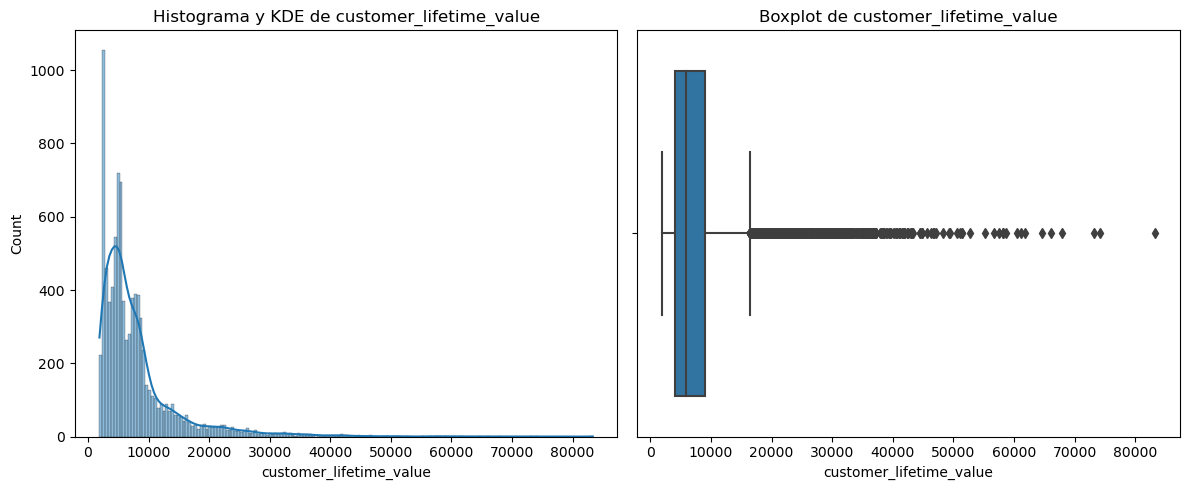

In [10]:
plot_combined_graphs(df_seguros,["customer_lifetime_value"])

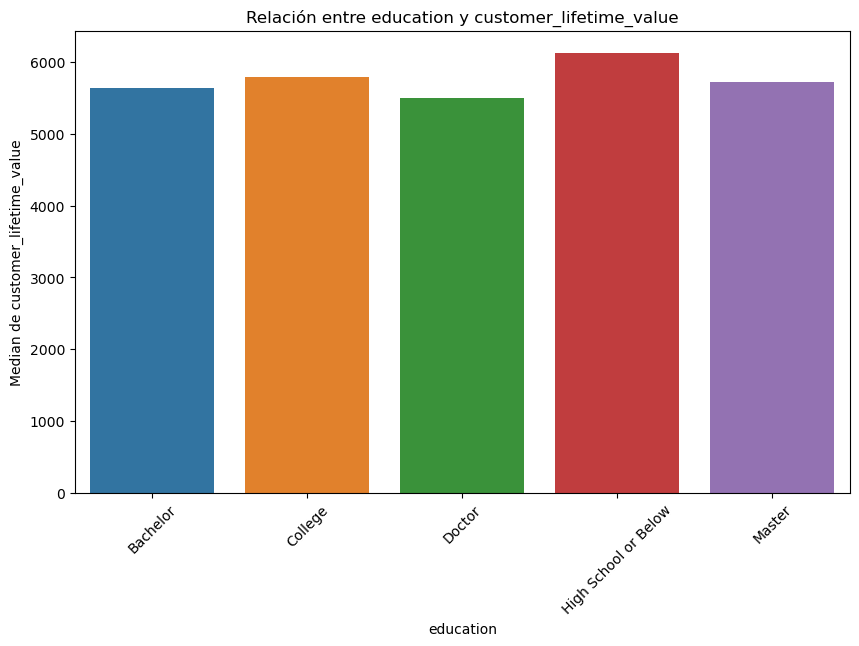

In [11]:
plot_categorical_numerical_relationship(df_seguros,"education","customer_lifetime_value", measure = "median")

Este es un dato curioso, si la mediana es buena representación, no correla linealmente con el grado de estudios (que es una categórica que podríamos considerar ordinal), de hecho los doctores "pagan" menos o eso parece (por ahora eso parece, tendría aquí una hipótesis curiosa para seguir)

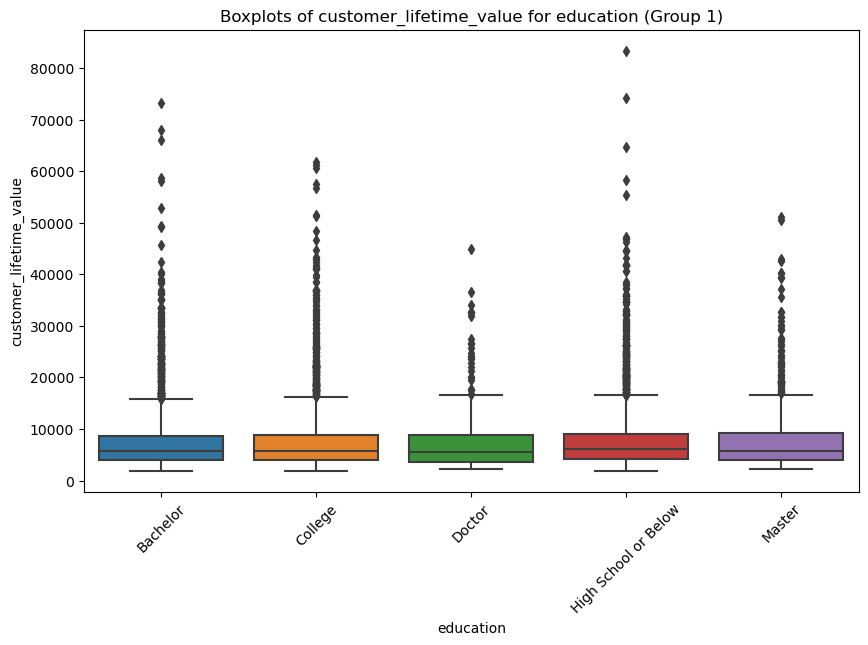

In [12]:
plot_grouped_boxplots(df_seguros,"education","customer_lifetime_value")

Hmm, así es a ojo y en este momento sacaría el describe agrupado de CLV para ver los percentiles, pero tiene pinta de que los que tienen master son los de mayor percentil 75 y que los Doctor tienen mayor dispersión. Esto no me sirve de mucho. Sigamos con las distribuciones. High School or Below parece más compacto y con mejores números que el resto. 
Ah, y fijate donde están los mayores outliers de CLV, eso me plantearía estudiarlos con cuidado, porque no me esperaba que fueran los que más CLV tuviesen. Lo cual no tiene por qué ser nada raro (que sean ellos, pueden ser clientes con flotas de coches, o autónomos con varios coches) pero despierta mi curiosidad.

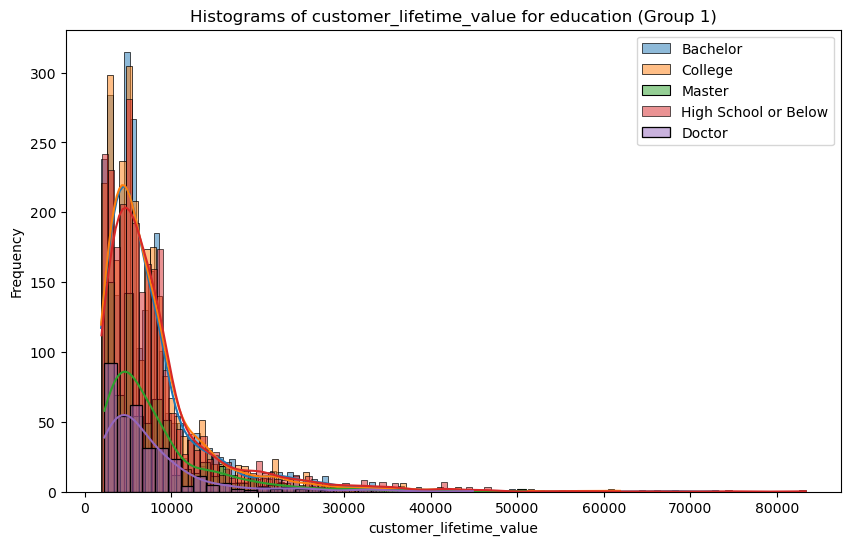

In [13]:
plot_grouped_histograms(df_seguros,"education", "customer_lifetime_value", 5)

Aunque al comparar las distribuciones entre sí, lo cierto es que no parece haber tanta diferencia, siguen perfiles similares, mucho, pero es cierto que los doctores son muchos menos y eso crea ese efecto. En este caso sí que quería ver números:

In [14]:
df_seguros.groupby("education")["customer_lifetime_value"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,2748.0,7872.660412,6759.397589,1898.007675,3982.143538,5642.053579,8709.845851,73225.95652
College,2681.0,7851.064644,6686.908165,1898.683686,3924.416277,5792.439588,8870.673845,61850.18803
Doctor,342.0,7520.344837,6267.986710,2267.604038,3530.141132,5494.192881,8747.557593,44856.11397
High School or Below,2622.0,8296.709033,7220.572156,1940.981221,4118.770451,6130.478049,9080.524065,83325.38119
Master,741.0,8243.484692,6908.841255,2272.307310,4064.107529,5718.276608,9150.137599,51016.06704


Sin duda, repetiría este análisis separando los outliers para confirmar que el nivel de educación correla inversamente con el CLV aunque sea muy ligeramente. Y otra métrica interesante que me gustaría comprobar es el porcentaje de outliers en total y por grupo.

### Caso 2. Viajes: Bivariante aircompany-ingresos

Pues directo al grano:

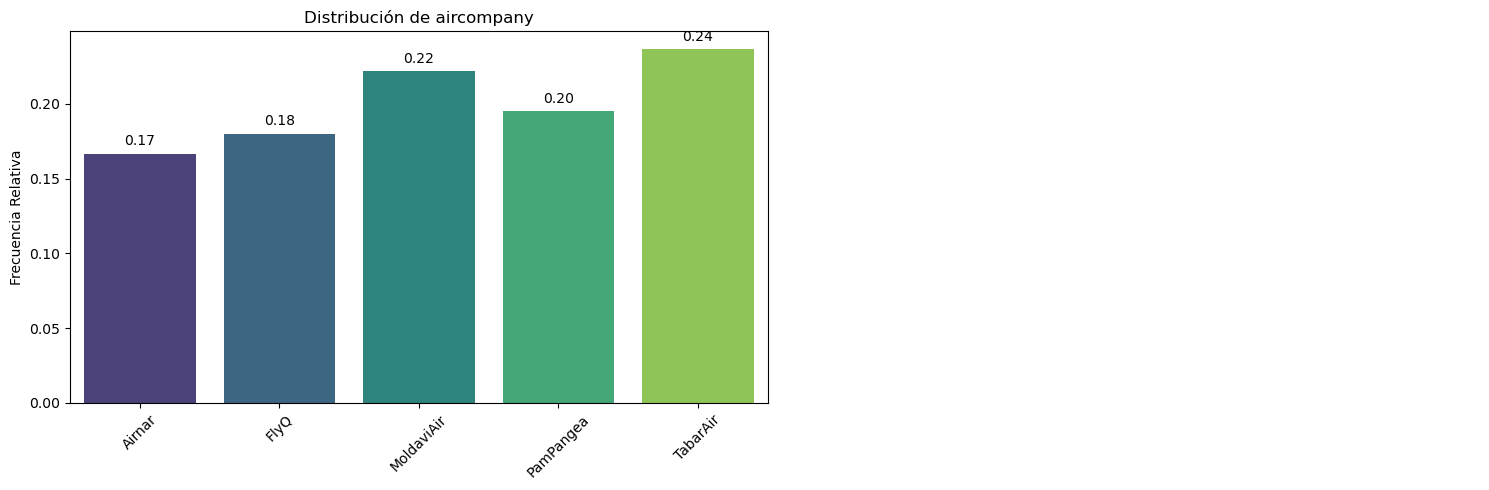

In [15]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


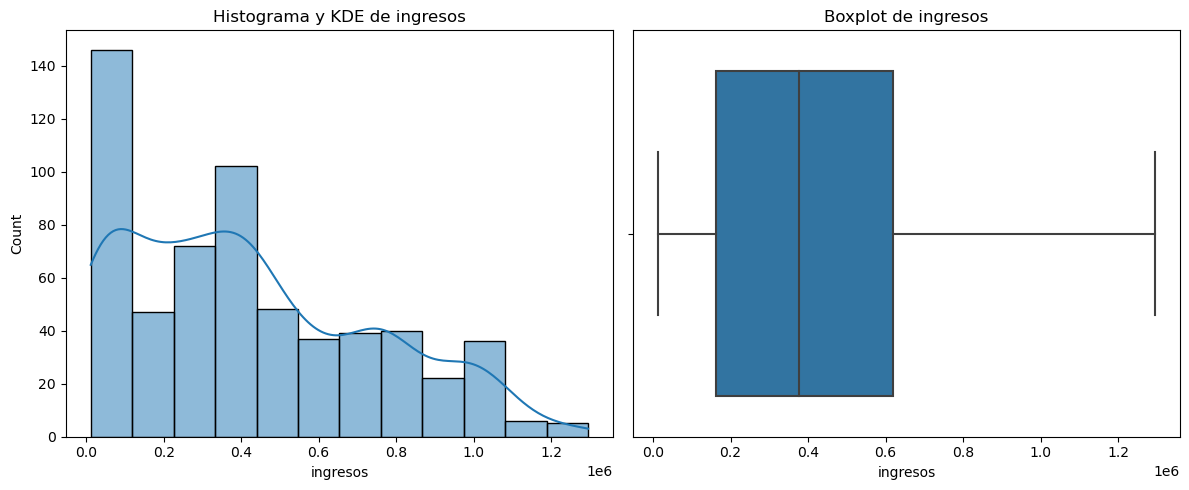

In [21]:
plot_combined_graphs(df_air_jun,["ingresos"])

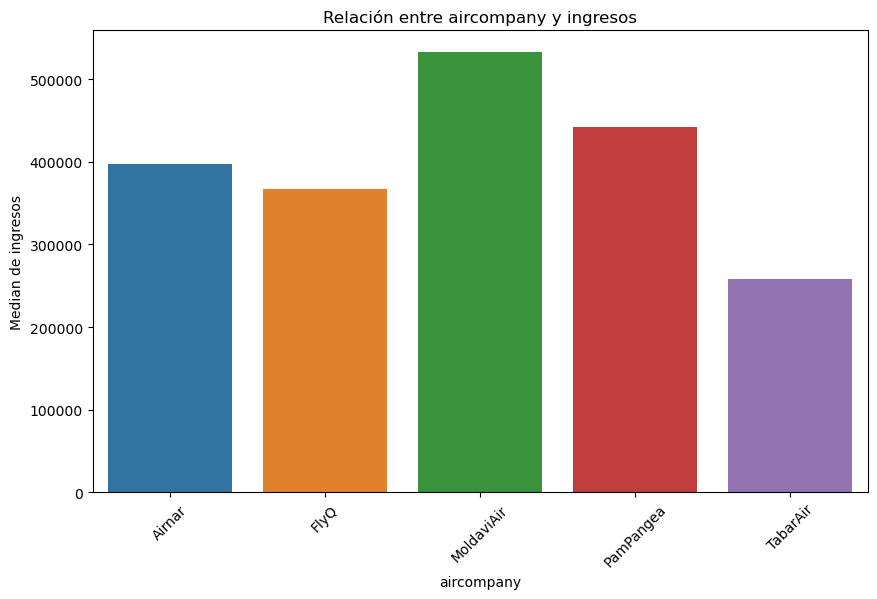

In [22]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana

Este resultado parece bastante potente. Tenemos el mayor número de vuelos pero nuestros ingresos considerando la mediana son los menores de todos. Ojo, esto sólo es para quedárselo apuntado, pero es ya una hipótesis de trabajo potente, ¿es esta una mala foto? Puede que seamos la que menos ingresa pero la que menos consume y al final el beneficio se equilibre o sea mayor (es cierto que cada viaje tiene un coste no imputado...) En general hemos encontrado otro punto donde exacarvar... y sacarle todo el jugo, vamos a confirmarlo viendo el resto de comparativas

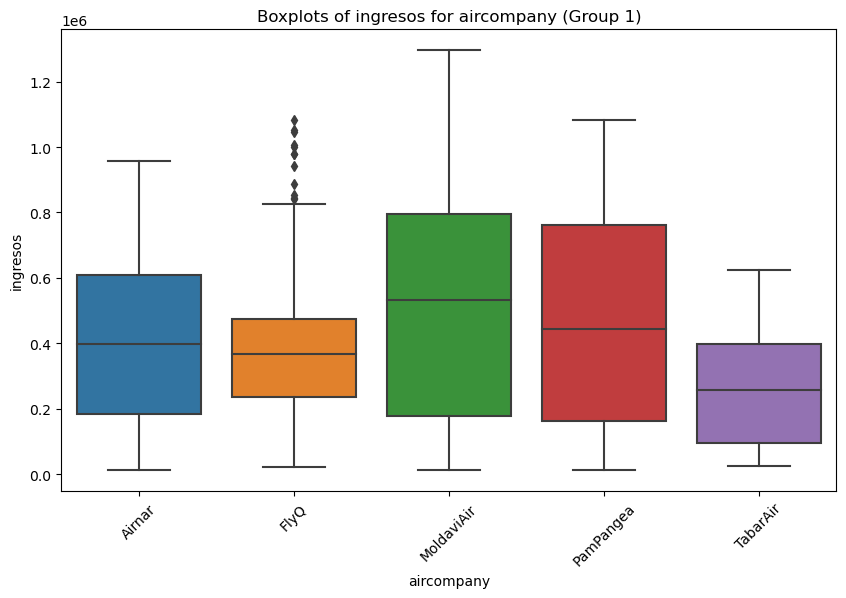

In [23]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

Esto tiene mala pinta sin duda, para Tabarair, para nuestro estudio es magnífico porque nos abre todo un camino de trabajo.

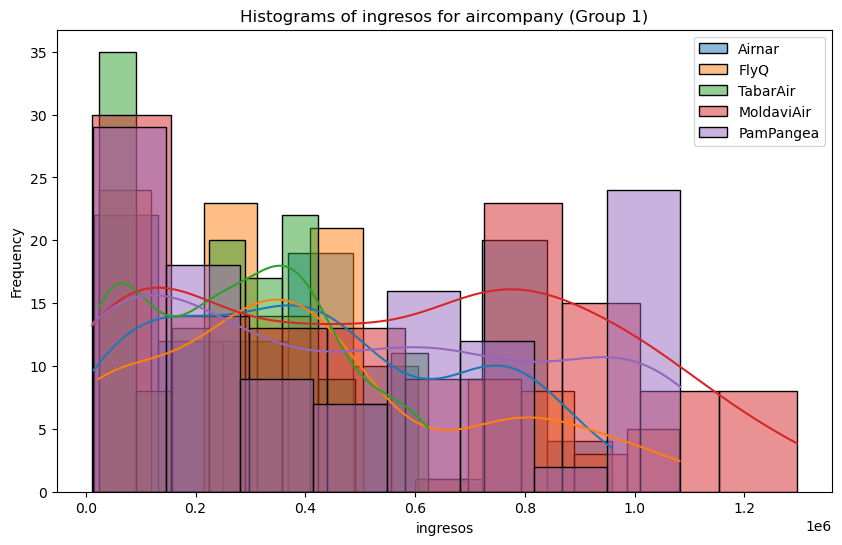

In [24]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 5)

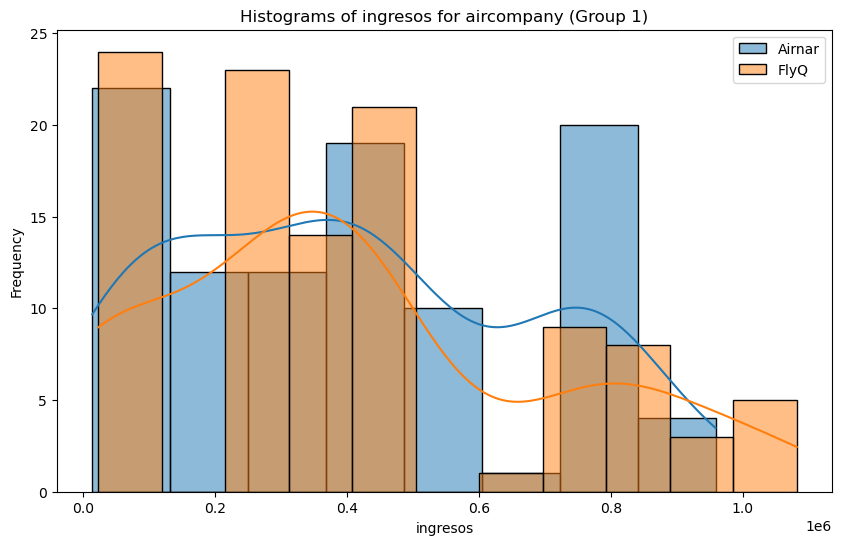

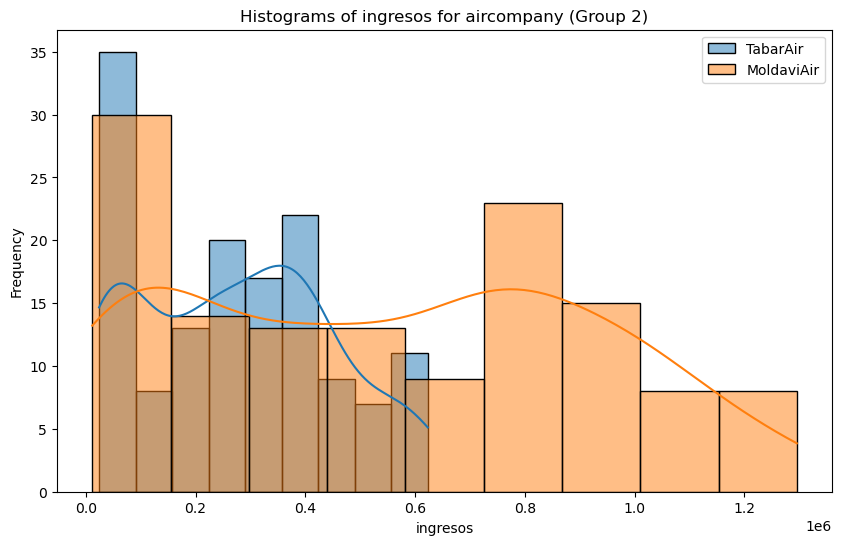

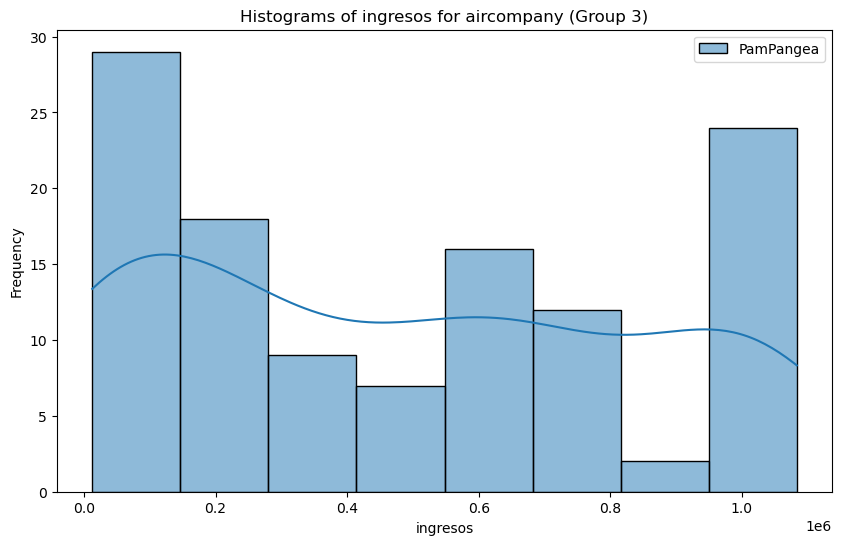

In [25]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

Se ve claramente que TabarAir tiene el menor rango de ingresos, que ya lo sabíamos de ver los boxplots, y que casi los concentramos, habrá que compararlo con distancias y consumos para chequear la eficiencia. Y sin ser un experto parece que Pampangea y Moldaviair tienen una dispersión de ingresos que invita a pensar que están mejor diversificados (tienen vuelos de todos los gustos, aunque esto es otra hipótesis a confirmar). Lo importante: Tabarair es la empresa con más vuelos, menos ingresos en mediana, menor rango de ingresos con un pico en vuelos de pocos ingresos y una distribución casi gaussiana. Mientras Airnar con menos vuelos es la tercera en ingresos. Hmm, se pone interesante este dataset.